# ASTR 21100 

# *"Computational Techniques in Astrophysics"*

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

### Teaching Assistants: 
### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

### Course syllabus

Available <a href="https://docs.google.com/document/d/1R_68I3HV6ItznZz1_NaZsDf_s4fpGFXoWKkIv3eneVk/edit?usp=sharing">online.</a>

### Python with NumPy 

We will heavily use <a href="https://numpy.org/"><tt>numpy</tt></a> python package. Numpy has handy routines for various tasks such as reading formatted files, and array initialization.

The main reason for its heavy use in computations with python is that python, being an interpreted language, is quite slow, especially in computations involving loops with large iteration counts. 

Numpy provides relatively fast routines to perform commonly encountered operations applied to all elements of arrays at once, thereby avoiding costly loops. 

#### Consider computing distance to an object of a given brightness in expanding universe. 

In 1929, Edwin Hubble (UChicago alum and a college <a href="https://en.wikipedia.org/wiki/1909%E2%80%9310_Chicago_Maroons_men%27s_basketball_team">basketball star player</a> and coach) showed that our Universe is expanding by demonstrating that that there is a correlation between distance and recession velocity of galaxies, $v=cz$ (where $c$ is speed of light), as measured by its spectral line shift relative to its wavelenght in the lab frame, $z=\Delta (\lambda_{\rm obs}-\lambda_{\rm lab})/\lambda_{\rm lab}$:

$$ cz \propto d = H_0\, d,$$

where $H_0$ is now called *the Hubble constant*. 

<center>
<img width=900 src="img/uchicago_basketball_team_09_10.jpg"></img>
</center>

In 1929, Edwin Hubble showed that our Universe is expanding by demonstrating that that there is a correlation between distance and recession velocity of galaxies.
<p></p>
<center><img  width=900 src="img/hubble29_v_d_fig.png"></img></center>

Almost all galaxy spectral shifts are to the red, so the widespread term for these is *redshift.* 

Given that distnces to galaxies are usually measured in the units natural for this purpose - million parsecs or Megaparsec (Mpc for short) and $cz$ has units of velocity, which is usually measured for galaxies in $\rm km/s$, $H_0$ is usually quoted in units of $\rm km/s/Mpc$. 

A modern version of the Hubble diagram (from <a href="https://ui.adsabs.harvard.edu/abs/2019ApJ...882...34F/abstract">Freedman et al. 2019</a>). TRGB is short for "tip of the red giant branch", which refers to a <a href="https://en.wikipedia.org/wiki/Tip_of_the_red-giant_branch">particular way of measuring distances.</a> 

<br>
<center><img width=1000 src="img/freedman_etal19_hubble_diagram.png"></img></center>

###  What is distance modulus? 

#### Fluxes in astronomy are measured using *magnitudes* 

Flux of an object (radiation energy per unit time per unit area of detector) of intrinsic luminosity $L$ (emitting a given amount of radiation energy per unit time) at a distance $d_L$ is computed as $f=L/(4\pi d_L^2)$. 

For historical reasons, astronomers measure fluxes, not as $f$ but in *magnitudes* that depend on $f$ logarithmically: 

$$m = -2.5\log_{10} f +{\rm const},$$ 

where $\rm const$ is a constant that defines *magnitude system.* 

If we plug in expression for $f$ into this equation we get: 

$$m= -2.5\log_{10} L + 5\log_{10} d_L + \log_{10}4\pi + {\rm const} = -2.5\log_{10} L + 5\log_{10} 10\ {\rm pc} - 5\log_{10} 10\ {\rm pc} + {\rm const} + 5\log_{10} d_L = M + 5\log_{10}\frac{d_L}{10\,\rm pc}, $$

where $M$ is the absolute magnitude, defined as the *apparent magnitude* that the object would have for an observed on Earth, if it was located at a distance of $10$ parsecs. 

### The distance modulus 

is a quantity defined as 

$$\mu = m-M = 5\log_{10}\frac{d_L}{10^{-5}\,\rm Mpc} = 5\log_{10} d_L + 25,$$

where $d_L$ is assumed to be in units of Megaparsecs (Mpc). 

#### Supernovae type Ia are the best distance indicators for very large distances

In this image a supernova at $z\approx 1.9$ was <a href="https://www.universetoday.com/101240/hubble-telescope-breaks-record-for-finding-most-distant-supernova/">detected</a> by <a href="https://www.nasa.gov/mission_pages/hubble/story/index.html">the Hubble Space Telescope.</a>

<br>
<center><img width=1000 src="img/hst_sn1306d_full.jpg"></img></center>

It turns out that this “Hubble law” is just the local manifestation of a more complicated, nonlinear relation between distance and redshift. 


A modern version of the Hubble diagram (from <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...746...85S/abstract">Suzuki et al. 2012</a>) for <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">type Ia supernovae</a>.

<br>
<center><img width=1000 src="img/suzuki_etal12_hubble_diagram.png"></img></center>

### Was Hubble wrong? 

Think Taylor expansion of the distance (or distance modulus): linear term is simply the first two terms of the expansion. 

Consider Taylor expansion of $f(x)$ arond $x_0$:
$$f(x) = \sum\limits^\infty_{n=0} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}=f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \frac{1}{6}f^{(3)}(x_0)\,(x-x_0)^3+ \mathcal{O}[(x-x_0)^4].$$

Thus, to linear order: 
$$f(x) \approx f(x_0)+f^\prime(x_0)\,(x-x_0).$$

The difference between $f(x)$ and approximation using limited number of terms, such as $f(x_0)+f^\prime(x_0)\,(x-x_0)$, is called *truncation error*. 

In [2]:
import numpy as np
from math import factorial 

def exp_Taylor(x0, N, x):
    """
    Taylor expansion up to order N for exp(x)
    """
    dummy = np.zeros_like(x)
    for n in range(N+1):
        dummy += np.exp(x0)*(x-x0)**n/factorial(n)
    return dummy


In [3]:
import matplotlib.pyplot as plt

In [6]:
def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1])

    return

plot_pretty(dpi=250, fontsize=9)

### LaTeX

Although not strictly required, I highly recommend installing <a href="https://www.latex-project.org/get/">a LaTeX distribution</a> on your laptop. I use LaTeX commands to format plot labels in matplotlib. 

In [4]:
plt.rc('text', usetex=True)


In [7]:
plot_pretty(dpi=150, fontsize=12)

In [8]:

def taylor_exp_illustration(figsize=3.0):
    N = 4; x0 = 1.0

    plt.figure(figsize=(figsize,figsize))
    #plt.title('Taylor expansion of $e^x$ at $x_0=%.1f$'%x0, fontsize=9)
    plt.xlabel('$x$'); plt.ylabel(r'$e^x, f_{\rm Taylor}(x)$')

    xmin = x0 - 1.0; xmax = x0 + 1.0
    x = np.linspace(xmin, xmax, 100)
    plt.xlim([xmin,xmax]); plt.ylim(0.,8.)

    exptrue = np.exp(x)
    plt.plot(x, exptrue, linewidth=1.5, c='m', label='$e^x$')
    colors = ['darkslateblue', 'mediumslateblue', 'slateblue', 'lavender']
    lstyles = [':','--','-.','-','-.']
    for n in range(N):
        expT = exp_Taylor(x0, n, x)
        plt.plot(x, expT, linewidth=1.5, c=colors[n], ls=lstyles[n], label='%d order'%n)

    plt.legend(loc='upper left', frameon=False, fontsize=7)
    plt.show()


Consider expansion of $f(x) = e^x$ around $x_0=1$. Plot below shows $e^x$ itself and the first 4 terms of the Taylor expansion.  

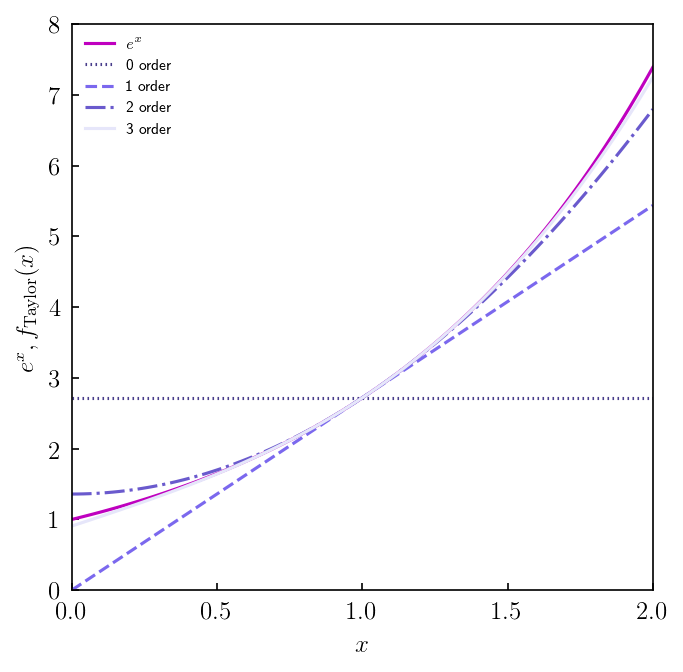

In [10]:
taylor_exp_illustration(figsize=5.0)

### Distances in expanding universe

Cosmological models, constructed using solutions of the Einstein’s equations of General Relativity predict that relation depends on the matter and energy mass density of the universe - i.e., everything that gravitates and that enters in the right hand side of the Einstein's equations. These mass densities are usually expressed in *dimensionless units* - i.e., normalized to a characteristic *critical density*, $\rho_{\rm crit}$. So for example, the mean mass density of matter in the universe around us is expressed as $\Omega_{\rm m0} = \rho_{\rm m0}/\rho_{\rm crit}$.    

<center>
<img width=900 src="img/gr_equation.jpg"></img>
<img width=500 src="img/einstein_chalkboard.jpg"></img>
</center>

#### *"Cosmology: a search for two numbers."* - <a href="https://physicstoday.scitation.org/doi/10.1063/1.3021960">Allan Sandage (1970)</a> 

Cosmological models, in which universe contains only matter derived from the solutions of the Einstein’s equations of GR predict that relation is given by the following formula (<a href="https://ui.adsabs.harvard.edu/abs/1977AmJPh..45..869T">Terrell 1977</a>):

$$d_L = \frac{c}{H_0}\, z\left[1 + \frac{(1-q_0)z}{1+q_0z+\sqrt{1+2q_0z}}\right],$$

where $q_0=\Omega_{m0}/2$ is the *deceleration parameter*. The two numbers in the quote above are $H_0$ and $q_0$. 

Pause to think how long would it take you to compute $d_L$ on a piece of paper without computer or calculator. While you are at it, think about how would you compute square root with a pen and paper.  

 Subscript $L$ in $d_L$ indicates that this is the *luminosity distance* - i.e., the distance to be used to compute flux of an object of a given intrinsic luminosity $L$. This is needed because in expanding universe, different (although related) distance definitions are used in different situations. 

In [14]:
import numpy as np 

clight = 2.99792458e5 # c in km/s

def d_L_simple(z, H0, Om0):
    q0 = 0.5 * Om0
    q0z = q0 * z
    return clight * z/H0 * (1. + (z-q0z) / (1. + q0z + np.sqrt(1. + 2.*q0z)))  

In [15]:
Om0 = 0.3; H0 = 70. # H0 in km/s/Mpc

z = 2.
dL = d_L_simple(z, H0, Om0)

print("d_L = %.3f Mpc"%dL)

d_L = 14242.634 Mpc


The cool thing is that we can now recompute it for a very large number of different parameters with almost no additional coding effort. 

In [16]:
#define evenly spaced grid of z values using a numpy function
z = np.linspace(0., 10., 1000)

# compute distances for all redshifts z in one call
dL = d_L_simple(z, H0, Om0)

In [43]:
print(np.size(dL), np.min(dL), np.max(dL))

1000 0.0 123723.87155555555


### Matplotlib

Matplotlib is a package for (mostly) 2D plots built upon the Numpy and Scipy libraries. It was conceived by <a href="https://en.wikipedia.org/wiki/John_D._Hunter">John Hunter</a> at U.Chicago in 2002, developed by him and others over the subsequent decade into a full-fledged library. 


In [17]:
# import matplotlib
import matplotlib.pyplot as plt
# use jupyter "magic" command to tell it to embed plot into the notebook 
%matplotlib inline

def plot_line(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', legend=None, figsave = None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    
    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        plt.legend(frameon=False, loc='lower left')
    else:
        plt.plot(x, y, lw = 1., c=col)

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()
    

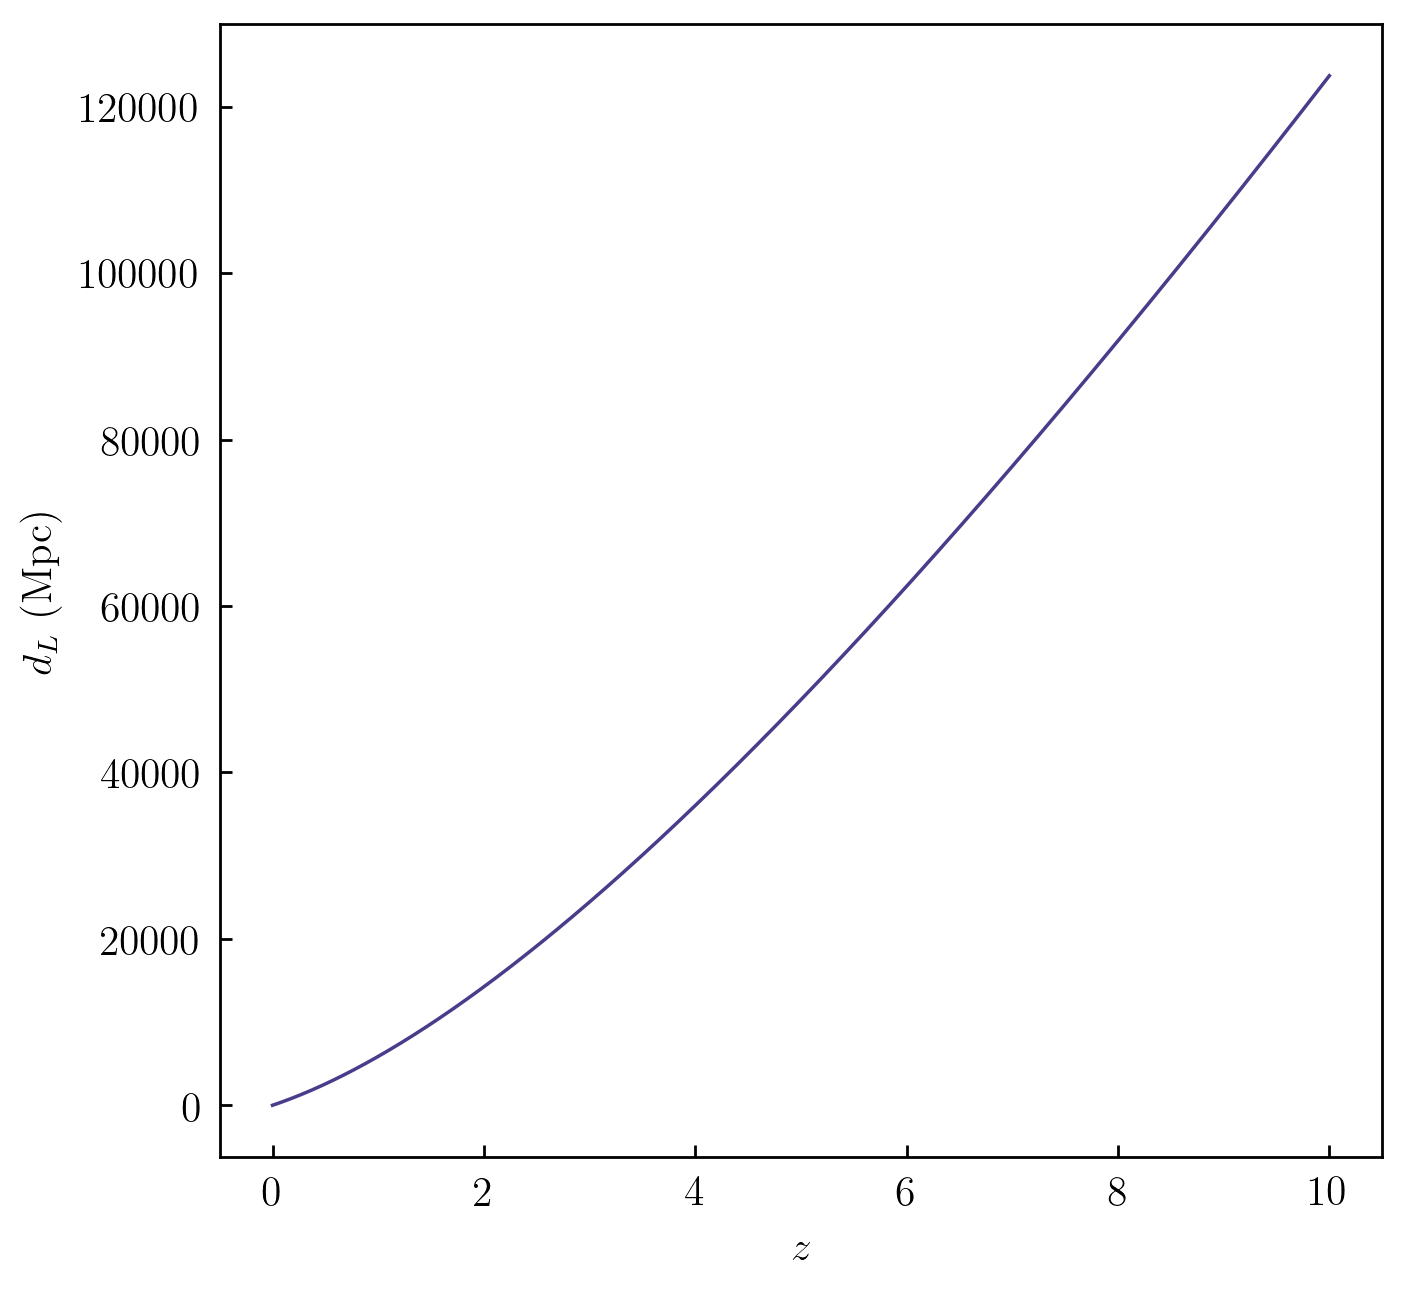

In [27]:
plot_line(z, dL, xlabel=r'$z$', ylabel=r'$d_L\ \rm (Mpc)$', figsize=6)

Is this plot "publication quality"? What is publication quality? To get an idea we can look at a typical astronomical publication.

Matplotlib allows for very detailed customization of plots. It may be tricky to find customization you want, but options in the routine below allow to control the main features of the plot. 

In [26]:
def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1])

    return

plot_pretty(dpi=250, fontsize=12)

### LaTeX

Although not strictly required, I highly recommend installing <a href="https://www.latex-project.org/get/">a LaTeX distribution</a> on your laptop (see <a href="https://matplotlib.org/3.1.1/tutorials/text/usetex.html">here</a> for information for how to use LaTeX with matplotlib. I use LaTeX commands to format plot labels in matplotlib and we can use LaTeX fonts for axis labels. 

In [22]:
# option to use LaTeX with matplotlib
plt.rc('text', usetex=True)


### Distances in general cosmological models

$$d_c =\int\limits_0^z \frac{dz}{E(z)}.$$

where $\Omega_k = 1-\Omega_{\rm m0} - \Omega_\Lambda$ and $E(z)=\sqrt{\Omega_{\rm m0}(1+z)^3+\Omega_k(1+z)^2+\Omega_\Lambda}.$

$$
d_L(z,\Omega_0,\Omega_\Lambda) = \frac{c}{H_0}\,(1+z)\,\left\{
\begin{array}{ll}
\frac{1}{\sqrt{\Omega_k}}\,\sinh\left[\sqrt{\Omega_k}\,d_{\rm c}\right] & {\rm for}~\Omega_k>0 \\
d_{\rm c} & {\rm for}~\Omega_k=0 \\
\frac{1}{\sqrt{|\Omega_k|}}\,\sin\left[\sqrt{|\Omega_k|}\,d_{\rm c}\right] & {\rm for}~\Omega_k<0
\end{array}
\right.
$$


<a href="https://www.astropy.org/">Astropy</a> package has a <a href="https://docs.astropy.org/en/stable/_modules/astropy/cosmology/core.html#FLRW">cosmology routines</a>, on which computes $d_L$ for input cosmological parameters.

In [31]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_L_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [56]:
# check
Om0 = 0.3; OmL = 0.0; H0 = 70.; z = 1.0 
print(d_L_astropy(z,H0,Om0,OmL), d_L_simple(z,H0,Om0))

5872.294441005939 5872.294441005937


In [111]:
nz = 1000
z = np.linspace(0.,10.,nz)

Om0 = 0.3; OmL = 0.7; H0 = 70.
%timeit dummy = d_L_astropy(z,H0,Om0,OmL)
#print("execution time = %.2g sec"%(timeit.default_timer()-tstart))


404 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Using SciPy's integration routine <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html"><tt>scipy.integrate.romberg</tt></a>

In [36]:
def dl_func(z, H0, Om0, OmL, Omk):
    z1 = 1.0 + z; z12 = z1 * z1
    return 1.0 / np.sqrt(z12*(Om0*z1 + Omk) + OmL)

In [49]:
from scipy.integrate import romberg

def d_L(z, H0, Om0, OmL, atol=1.e-8, rtol=1.e-8):
    if 1.0+OmL == 1.0:
        return d_L_simple(z, H0, Om0)
    else:
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        dc = romberg(dl_func, 0., z, args=(H0, Om0, OmL, Omk), tol=atol, rtol=rtol)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

In [72]:
H0, Om0, OmL = 70., 0.3, 0.7;

dL = np.zeros_like(z)

import timeit
tstart = timeit.default_timer()
for i, zd in enumerate(z):
    dL[i] = d_L(zd, H0, Om0, OmL, atol=1.e-10, rtol=1.e-15)
    
print("execution time = %.2g sec"%(timeit.default_timer()-tstart))


execution time = 0.72 sec


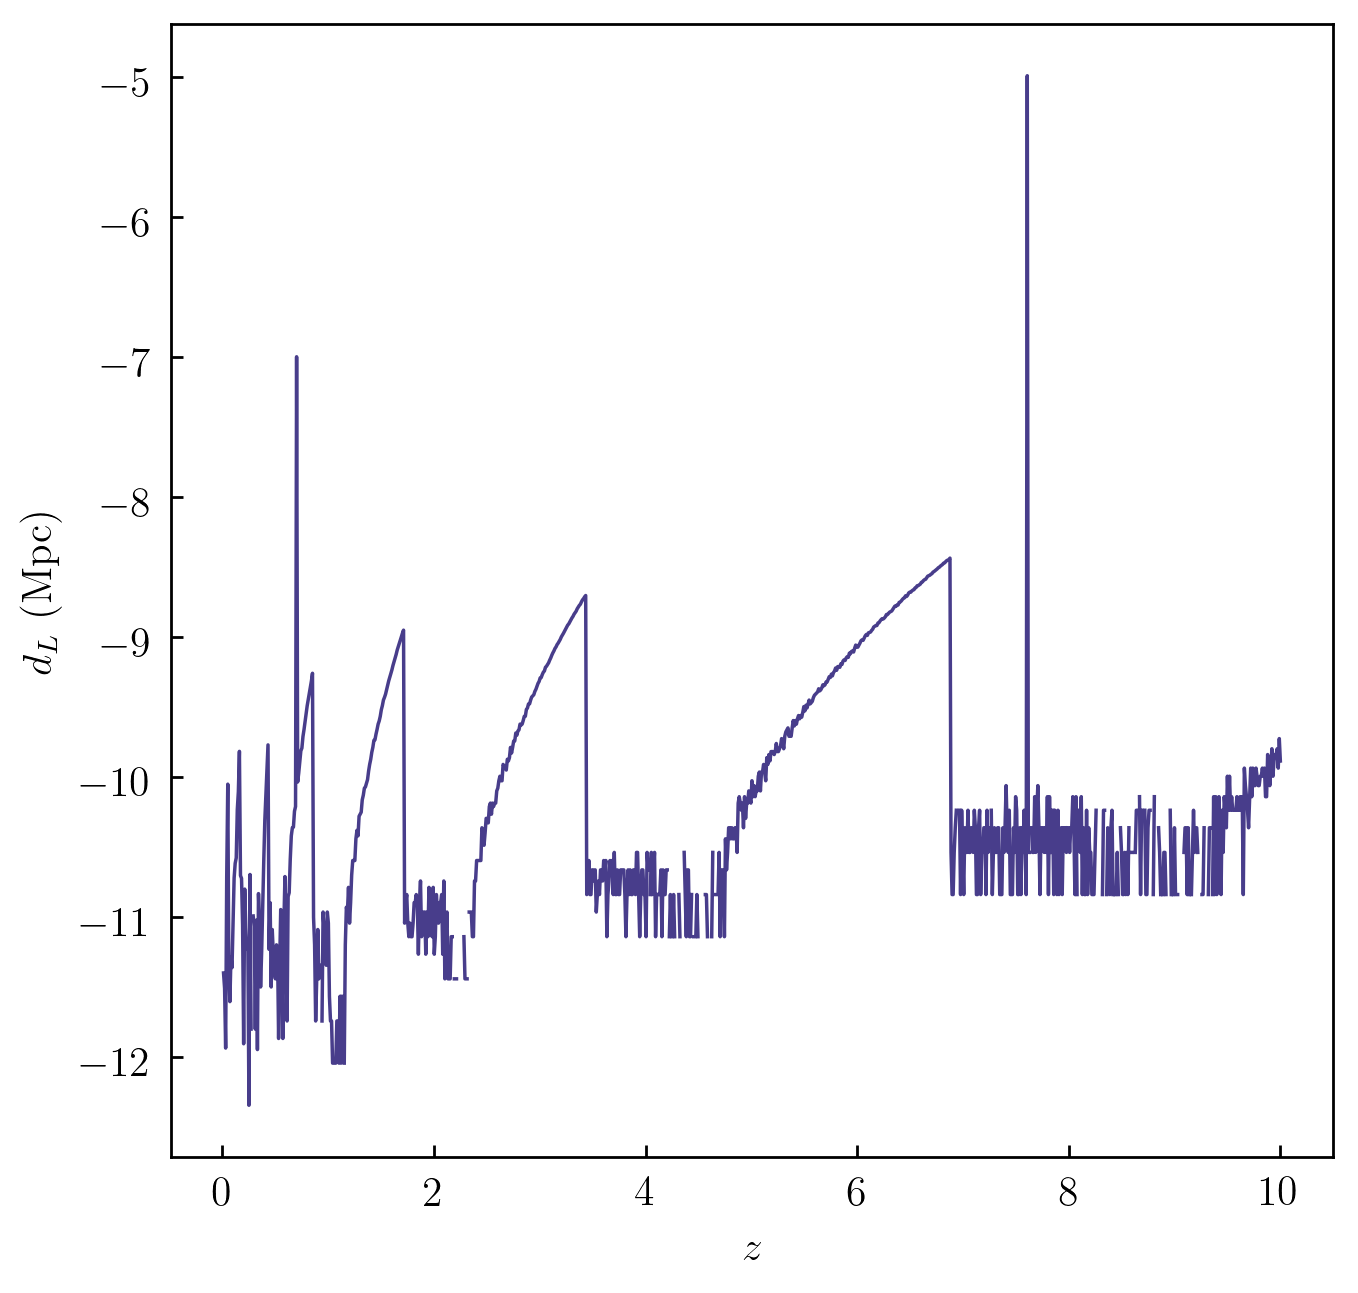

In [73]:
plot_line(z, np.log10(np.abs(dL-dummy)), xlabel=r'$z$', ylabel=r'$d_L\ \rm (Mpc)$', figsize=6)

In [98]:
def vectorize_func(func, *x):
    """ Helper function to vectorize function with array inputs"""
    return np.vectorize(func)(*x)


In [101]:
from scipy.integrate import quad
def _dc(z1, z2, *args, atol=1.e-8, rtol = 1.e-8):
    #f = lambda z1, z2: quad(dl_func, z1, z2, args=args)[0]
    f = lambda z1, z2: romberg(dl_func, z1, z2, args=args, tol=atol, rtol=rtol)
    if np.size(z1) > 1 or np.size(z2) > 1:
        return vectorize_func(f, z1, z2)
    else:
        return f(z1, z2)
    
def d_L_vectorized(z, H0, Om0, OmL, atol=1.e-8, rtol=1.e-8):
    if 1.0+OmL == 1.0:
        return d_L_simple(z, H0, Om0)
    else:
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        args = [H0, Om0, OmL, Omk]
        dc = _dc(0., z, *args, atol=atol, rtol=rtol)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

In [112]:
%timeit dL = d_L_vectorized(z, H0, Om0, OmL, atol=1.e-4, rtol=1.e-8)

147 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


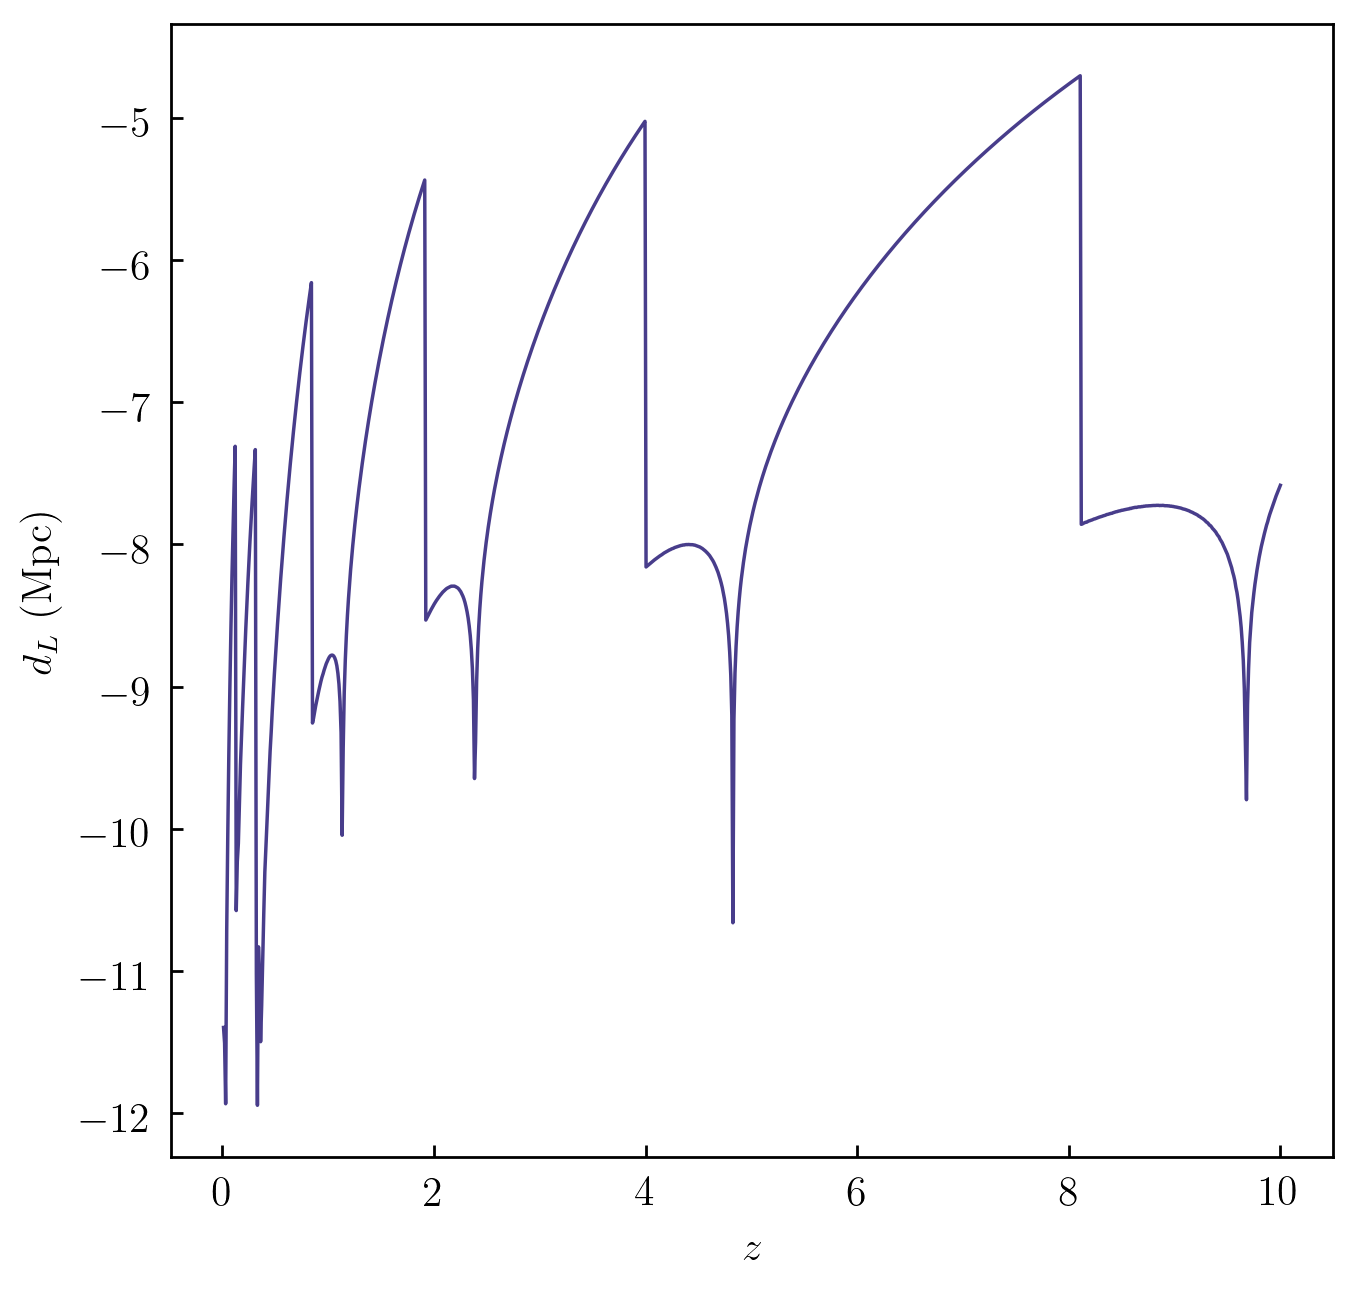

In [103]:
plot_line(z, np.log10(np.abs(dL-dummy)), xlabel=r'$z$', ylabel=r'$d_L\ \rm (Mpc)$', figsize=6)

### Can we achieve arbitrary accuracy?

In [113]:
eps = 1.0 
i = 0 

while 1.0 + eps != 1.0:
    eps = eps / 2
    i = i + 1

print(i-1, eps)
print(1.+eps)

This is because <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">a finite number of bits</a> (64) is used to represent floating point numbers in the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard used in Python and other languages:

<img src="img/IEEE_754_Double_Floating_Point_Format.svg"></img>



The spacing between floating numbers around a floating number $x$ will be $\approx 2\varepsilon\vert x\vert\approx 2.2\times 10^{-16}$, where $\varepsilon$ is the number above. Thus, *some floating point numbers can be represented exactly, while many other need to be* **rounded off.** 

Calculations with numbers that can be represented exactly are more accurate, but rounded off numbers are generic and cannot be avoided. 

This limited representable difference is the source of **roundoff errors** in numerical calculations

In [52]:
# however... I have two floating point numbers like this. Can we get their difference?
a = 1.1e-16; b = 1.05e-16

In [53]:
print(a-b)

4.999999999999995e-18


Python represents numbers using the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard. Additional information about the floating point representation can be found <a href="https://floating-point-gui.de/formats/fp/">here</a>. For an in-depth description of the standard for floating point number representation see this <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">paper.</a>

We can get all of the information about this representation in python as follows 

In [54]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


What does this all mean?  The first number shows the largest number that could be represented by the python float. It is defined by the number of bits used to represent the float: 64 on a 64-bit system (often considered as "double precision"). Of these 64 bits, one bit is reserved for sign, 11 bits are reserved for the exponent, and 52 bits for the *mantissa*.

In [55]:
eps = 1.0
i = 0 
while eps != 0.:
    eps = eps / 2
    i = i + 1
print(i, eps)

1075 0.0


In [56]:
x = 1.0

i = 0
while x != 0.:
    x = x / 2.
    i = i+1
    print(i,x)

1 0.5
2 0.25
3 0.125
4 0.0625
5 0.03125
6 0.015625
7 0.0078125
8 0.00390625
9 0.001953125
10 0.0009765625
11 0.00048828125
12 0.000244140625
13 0.0001220703125
14 6.103515625e-05
15 3.0517578125e-05
16 1.52587890625e-05
17 7.62939453125e-06
18 3.814697265625e-06
19 1.9073486328125e-06
20 9.5367431640625e-07
21 4.76837158203125e-07
22 2.384185791015625e-07
23 1.1920928955078125e-07
24 5.960464477539063e-08
25 2.9802322387695312e-08
26 1.4901161193847656e-08
27 7.450580596923828e-09
28 3.725290298461914e-09
29 1.862645149230957e-09
30 9.313225746154785e-10
31 4.656612873077393e-10
32 2.3283064365386963e-10
33 1.1641532182693481e-10
34 5.820766091346741e-11
35 2.9103830456733704e-11
36 1.4551915228366852e-11
37 7.275957614183426e-12
38 3.637978807091713e-12
39 1.8189894035458565e-12
40 9.094947017729282e-13
41 4.547473508864641e-13
42 2.2737367544323206e-13
43 1.1368683772161603e-13
44 5.684341886080802e-14
45 2.842170943040401e-14
46 1.4210854715202004e-14
47 7.105427357601002e-15
48 3.5

797 1.1997574511165048e-240
798 5.998787255582524e-241
799 2.999393627791262e-241
800 1.499696813895631e-241
801 7.498484069478155e-242
802 3.7492420347390774e-242
803 1.8746210173695387e-242
804 9.373105086847693e-243
805 4.686552543423847e-243
806 2.3432762717119234e-243
807 1.1716381358559617e-243
808 5.858190679279809e-244
809 2.9290953396399042e-244
810 1.4645476698199521e-244
811 7.322738349099761e-245
812 3.6613691745498803e-245
813 1.8306845872749401e-245
814 9.153422936374701e-246
815 4.5767114681873503e-246
816 2.2883557340936752e-246
817 1.1441778670468376e-246
818 5.720889335234188e-247
819 2.860444667617094e-247
820 1.430222333808547e-247
821 7.151111669042735e-248
822 3.5755558345213674e-248
823 1.7877779172606837e-248
824 8.938889586303419e-249
825 4.4694447931517093e-249
826 2.2347223965758547e-249
827 1.1173611982879273e-249
828 5.586805991439637e-250
829 2.7934029957198183e-250
830 1.3967014978599092e-250
831 6.983507489299546e-251
832 3.491753744649773e-251
833 1.745

In [114]:
nOm0 = 100; nOmL = 100
Om0min, Om0max = 0., 1
Om0 = np.linspace(Om0min, Om0max, nOm0)
OmLmin, OmLmax = 0., 1
OmL = np.linspace(OmLmin, OmLmax, nOmL)

dLgrid = np.zeros((nOm0, nOmL))

z = 1.0
tstart = timeit.default_timer()
for i, Omd in enumerate(Om0):
    for j, Omld in enumerate(OmL):
            dLgrid[i,j] = d_L_vectorized(z, H0, Omd, Omld)
            
print("execution time = %.8g sec"%(timeit.default_timer()-tstart))


execution time = 1.5481067 sec


In [115]:
from matplotlib import cm

def plot_color_map(data, xlabel = ' ', ylabel = ' ', figsize=3.0, figsave=None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    cmap = cm.get_cmap('winter')
    plt.pcolormesh(data, cmap=cmap, rasterized=True)
    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()


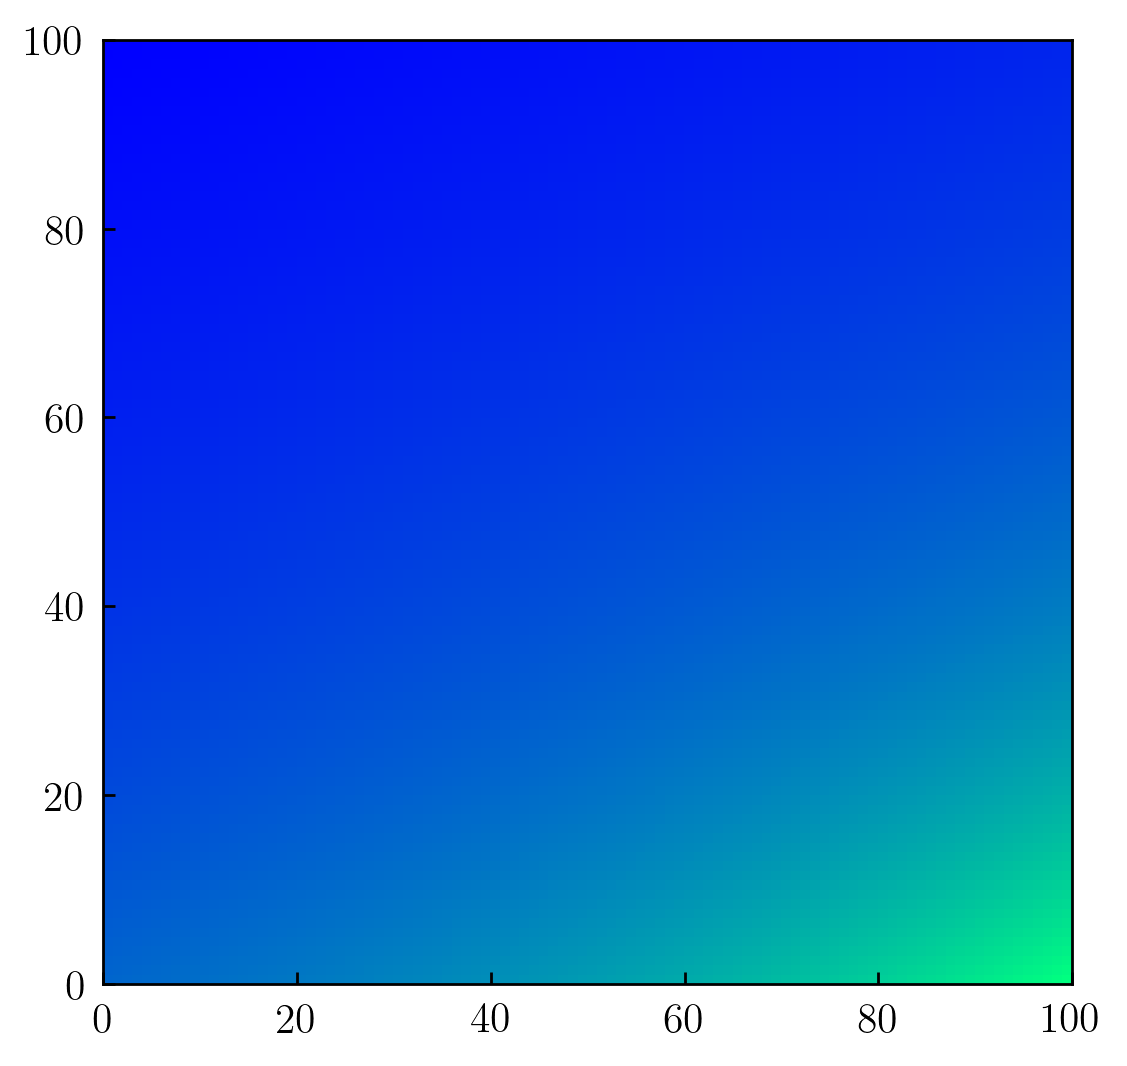

In [116]:
plot_color_map(dLgrid, figsize=5.0)

### Approximating functions

Approximating a function that is represented by a finite number of discrete tabulated values or measurements. In each case, there is some uncertainty associated with function values: by *tabulated values* we mean function values computed as accurately as *machine precision* allows. By measurements we mean values of function measured in some way with associated uncertainties usually much larger than the accuracy that is allowed by machine precision. 

### Approximating $d_L$ for faster execution

In [118]:
def plot_points(xp, yp, xlabel =' ', ylabel =' ', figsize=5., figsave=None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.scatter(xp, yp, marker=".", lw = 1., c='slateblue')

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()


In [119]:
def plot_line_plus_points(xl, yl, xp, yp, xlabel =' ', ylabel =' ', figsize=5., figsave=None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.scatter(xp, yp, marker=".", lw = 1., c='slateblue')
    plt.plot(xl, yl, lw = 2., c='m')

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()

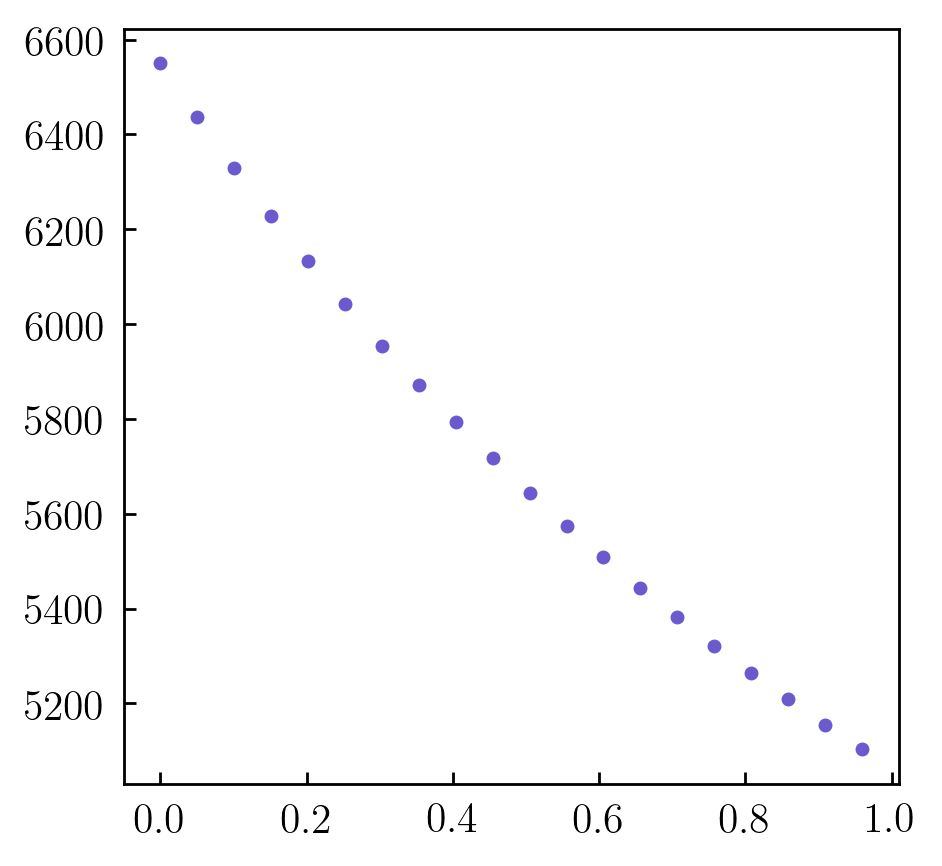

In [120]:
nsOmL = 10
nss = 5

plot_points(Om0[::nss], dLgrid[::nss,nsOmL], figsize=4)

In [121]:
porder = 10

polyfit = np.polyfit(Om0[::nss], dLgrid[::nss,nsOmL], porder)
pfit = np.poly1d(polyfit)

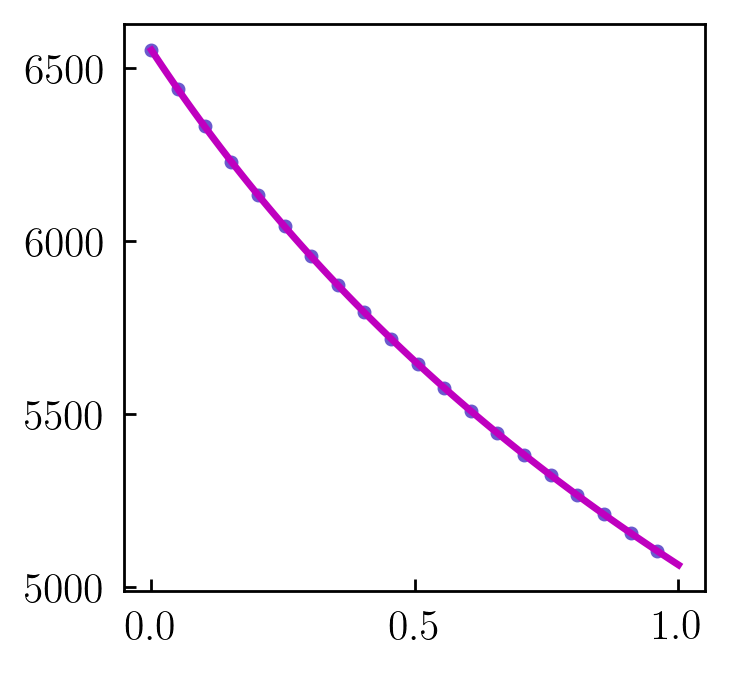

In [122]:
Oma = np.linspace(0., 1., 1000)

plot_line_plus_points(Om0, pfit(Om0), Om0[::nss], dLgrid[::nss,nsOmL], figsize=3)

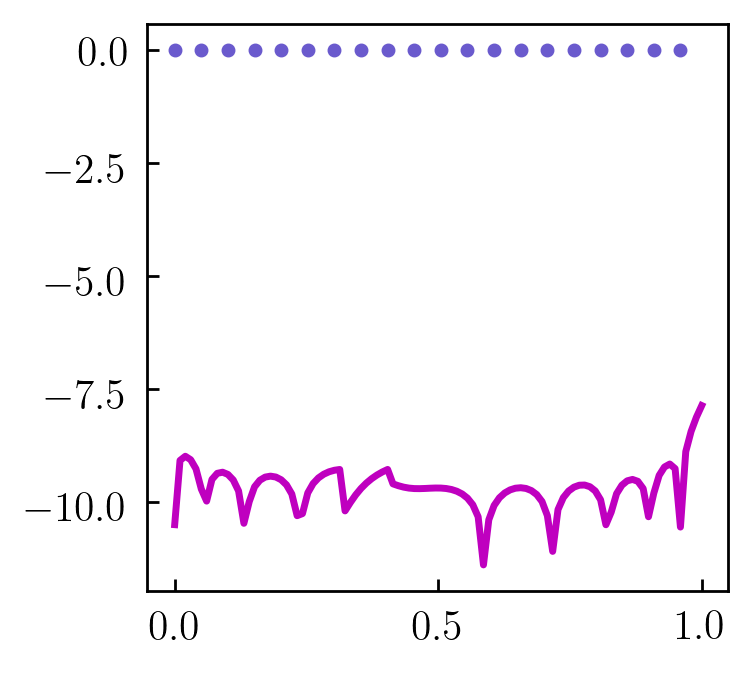

In [123]:
frac_error = np.log10(np.maximum(np.abs(1.0-pfit(Om0)/dLgrid[:,nsOmL]), 2.e-16))

plot_line_plus_points(Om0, frac_error, Om0[::nss], np.zeros_like(Om0[::nss]), figsize=3)

In [127]:
z = 1.0 
tstart = timeit.default_timer()
Omld = OmL[nsOmL]
for i, Omd in enumerate(Om0):
    dummy = d_L_astropy(z, H0, Omd, Omld)            
print("execution time = %.8g sec"%(timeit.default_timer()-tstart))

%timeit dummy = pfit(Om0)


execution time = 0.0329747 sec
20.4 µs ± 777 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Before next class, do your first assignment

* Install full Anaconda Python 3.7 distribution following <a href="http://docs.anaconda.com/anaconda/install/">installation instructions</a> for your OS on your laptop. 

* download the Jupyter notebook with these notes from the <a href="">course GitHub repository</a> (notebook 01_*.ipynb)

* Run Jupyter notebook server <tt>jupyter notebook</tt> and access the l01_intro.ipynb notebook. Make sure you can run it.  

* Get account on <a href="http://slack.com">Slack</a>, if you don't have one, and email me your user name to be added for access to <a href="https://a211w20.slack.com">Slack workspace</a> for this course.

* Answer questions in the first short assignment in the google form below (will also be available on Canvas).

In [3]:
from IPython.display import HTML

HTML(
"""
<iframe src="https://docs.google.com/forms/d/e/1FAIpQLSfn4o-w9Zjq8cR2H_8lh2qlEY51oGUnTdM1GuXZA1cmbujp9w/viewform?embedded=true"
width="760"
height="500"
frameborder="0"
marginheight="0"
marginwidth="0"
>Loading...</iframe>
"""
)